# AN LE
## MOVIE SENTIMENT ANALYSIS


In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Contents

<table>
<tbody>
<tr>
<th style="width:10%"
<td>**1.**</td><td>Abstract...................................................................</td><td> </td>
</th>
<tr>
<td>**2.**</td><td>Method and Results...............................................</td><td> </td>
</tr>
<tr>
<td></td><td>**2.1** Importing libraries into Python.........................</td><td> </td>
</tr>
<tr>
<td></td><td>**2.2** Data Description.............................................. </td><td> </td>
>
<tr>
<td></td><td>**2.3** Data Validation and Data Wrangling................................................ </td><td> </td>
</tr>
<tr>
<td></td><td>**2.4** Training Predicting data............. </td><td> </td>
</tr>
<tr>
<td>**3.**</td><td>Conclusion.............................................................</td><td></td>
</tbody></table>

<br>

## 1. ABSTRACT

The datasets are from The Rotten Tomatoes movie review dataset is a corpus of movie review analysis. The author of this report aimed to use the datasets from  with sentiments ranging from 0 to 5 indicates negative, somewhat negative, neutral, somewhat postitive and positive repesctively

## 2. Method and Result

### 2.1 Importing libraries into Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
%matplotlib inline

In [3]:
train_df=pd.read_csv("./all/train.tsv",delimiter='\t',encoding='utf-8')

### 2.2 Data Description

In [4]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.0+ MB


In [6]:
train_df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


### 2.3 Data Validation and Data Wrangling

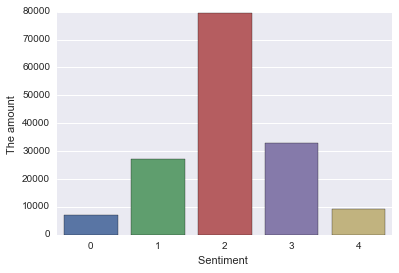

In [7]:
sns.countplot(train_df.Sentiment)
plt.xlabel('Sentiment ')
plt.ylabel('The amount ')

In [ ]:
From the overview, the reviews are mostly falling into 2 sentiment which is neutral

In [8]:
train_df['count']=train_df['Phrase'].apply(lambda x: len(x))

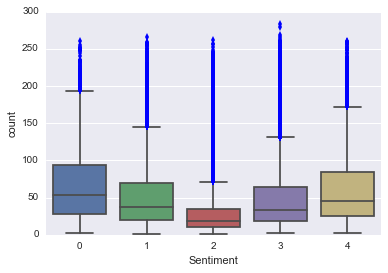

In [9]:
sns.boxplot(x='Sentiment',y='count',data=train_df)

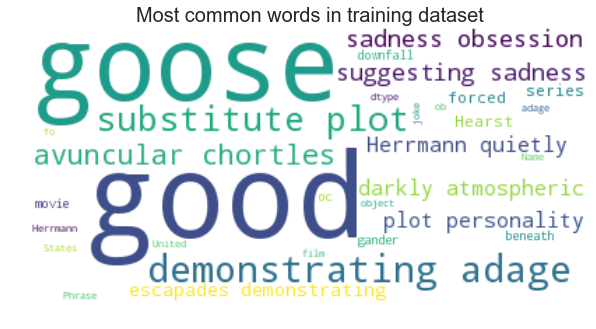

In [21]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=50)
# generate word cloud
wc.generate(str(train_df['Phrase']))
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(random_state=3))
plt.axis("off")
plt.title("Most common words in training dataset", fontsize=20)
plt.show()

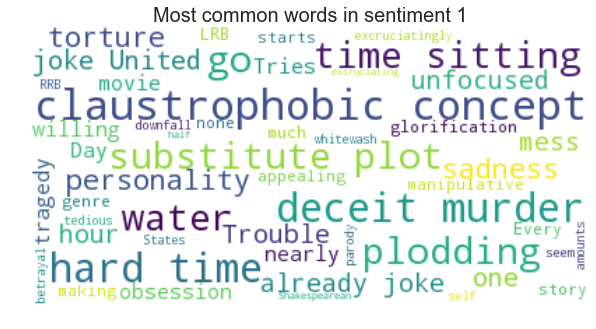

In [32]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=50)
# generate word cloud
wc.generate(str(train_df[train_df['Sentiment']==1]['Phrase']))
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(random_state=3))
plt.axis("off")
plt.title("Most common words in sentiment 1", fontsize=20)
plt.show()

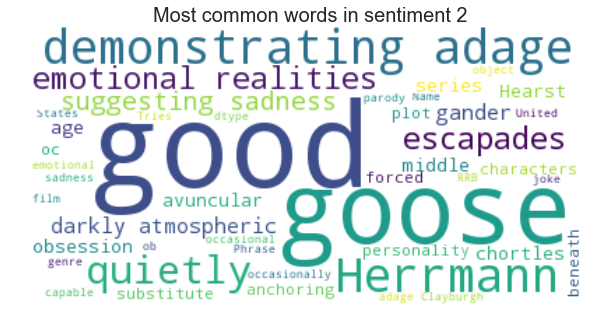

In [36]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=50)
# generate word cloud
wc.generate(str(train_df[train_df['Sentiment']==2]['Phrase']))
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(random_state=3))
plt.axis("off")
plt.title("Most common words in sentiment 2", fontsize=20)
plt.show()

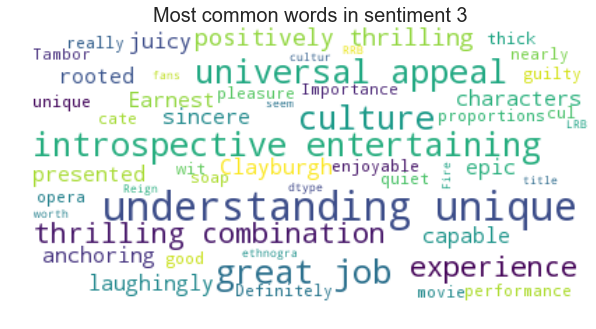

In [37]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=50)
# generate word cloud
wc.generate(str(train_df[train_df['Sentiment']==3]['Phrase']))
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(random_state=3))
plt.axis("off")
plt.title("Most common words in sentiment 3", fontsize=20)
plt.show()

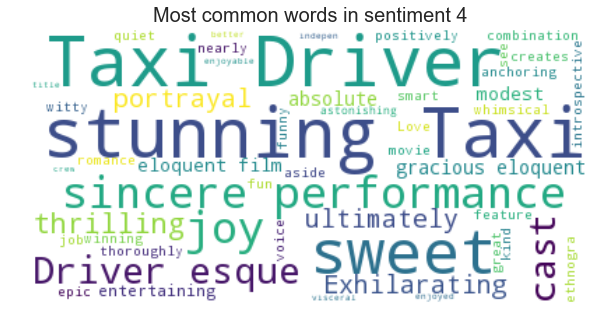

In [38]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=50)
# generate word cloud
wc.generate(str(train_df[train_df['Sentiment']==4]['Phrase']))
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(random_state=3))
plt.axis("off")
plt.title("Most common words in sentiment 4", fontsize=20)
plt.show()

In [40]:
import nltk
from nltk.tokenize import RegexpTokenizer


In [41]:
from nltk.tokenize import RegexpTokenizer

#w means tokens are made of only alphanumeric characters where + indicates that they comprise of one or more of such characters
tokenizer = RegexpTokenizer('\w+')

In [42]:
lemmatizer = nltk.WordNetLemmatizer()

#### lemmatizer the text

In [43]:
def text_process(sentence): 
    sentence=tokenizer.tokenize(sentence)
    return " ".join([lemmatizer.lemmatize(word) for word in sentence if lemmatizer.lemmatize(word.lower()) in nltk.corpus.words.words()])

In [ ]:
#saving them in the csv file 
clean_df=train_df['Phrase'][:].apply(text_process)
clean_df.head()

In [24]:
clean=pd.read_csv("cleandf.csv",index_col=None)
clean=clean.ix[:,1:3]

In [25]:
df=pd.DataFrame(index=None)

In [27]:
df['Phrase']=clean.Phrase

In [28]:
df.head()

,Phrase
0,A series of escapade the adage that what is go...
1,A series of escapade the adage that what is go...
2,A series
3,A
4,series


In [44]:
df['Sentiment']=train_df['Sentiment']

NameError: name 'df' is not defined

In [30]:
df=df.dropna()

In [31]:
leng=len(df)
leng

151205

In [32]:
df.reset_index(drop=True, inplace=True)

### 2.4 Training and predicitng

In [45]:
test=pd.read_csv("./all/test.tsv",delimiter='\t',encoding='utf-8')

In [46]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [47]:
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [48]:
X =train_df['Phrase']
y=train_df['Sentiment']

In [49]:
vect = CountVectorizer()


In [50]:
from sklearn.cross_validation import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

## Different training dataset methods

In [57]:
# Using Councectorizer and MultinomialNB
vect = CountVectorizer()
print 'Features: ', train_dtm.shape[1]
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Features:  15228
Accuracy:  0.611815968217


In [58]:
# remove English stop words and MultinomialNB
vect = CountVectorizer(stop_words='english')
print 'Features: ', train_dtm.shape[1]
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Features:  15228
Accuracy:  0.611815968217


In [42]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)


Features:  100
Accuracy:  0.512591311034


In [43]:
## remove English stop words and only keep 10000 features
vect = CountVectorizer(stop_words='english', max_features=10000)
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Features:  10000
Accuracy:  0.610181981289


In [44]:
# using TF-IDF and MultinomialNB with stopword
vect = TfidfVectorizer(stop_words='english',max_features=1000)
train_dtm = vect.fit_transform(X_train)
print train_dtm.shape
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

(124848, 1000)
Features:  1000
Accuracy:  0.547225426118


In [45]:
# using TF-IDF MultinomialNB
vect = TfidfVectorizer()
train_dtm = vect.fit_transform(X_train)
print train_dtm.shape
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

(124848, 15228)
Features:  15228
Accuracy:  0.584166346277


In [3]:
clean_df=pd.read_csv("cleandf.csv")

In [4]:
clean_df=clean_df.ix[:,1:3]

In [5]:
clean_df=clean_df.dropna()

In [6]:
X=clean_df.Phrase
y=clean_df.Sentiment

In [85]:
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

In [81]:
## Using Councectorizer and LogisticRegression
clf = LogisticRegression(C = 1)
clf.fit(train_dtm, y_train)
y_pred_class= clf.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Accuracy:  0.637575291555


In [86]:
## Using Councectorizer and LinearSVC
from sklearn.svm import LinearSVC
svm = LinearSVC(dual = False)
svm.fit(train_dtm, y_train)
y_pred_class = svm.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Accuracy:  0.639433551198


## 3. Conclusion
#### After trainning data with different algorithms, the author of this report decided to use  the combine  of Councectorizer and LinearSVC as the result given was highest accuracy

In [82]:
y_pred_class = svm.predict(test_dtm)
vect = CountVectorizer()
train_dtm = vect.fit_transform(X)
nb.fit(train_dtm, y)
test_dtm=vect.transform(test.Phrase)
y_pred_class = nb.predict(test_dtm)

In [83]:
submission['Sentiment']=y_pred_class

In [55]:
submission=pd.DataFrame()

In [56]:
submission['PhraseId']=test.PhraseId

In [74]:
train_df.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
156059,156060,8544,chortles,2


In [70]:
test.tail()

,PhraseId,SentenceId,Phrase
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded
66291,222352,11855,predictable scenario


In [77]:
submission['Sentiment']=y_pred_class

In [84]:
submission.head()

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3


In [87]:
submission.to_csv("submission.csv")